Created on Thu Nov 30 15:25:52 2017<br />
@author: Ajit Johnson<br />
Project: Comparing correaltion of a gene in two datasets

### Import Packages

In [1]:
import pandas as pd
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Enter gene of interest

In [2]:
GOI = 'CD3G'

### Import data

In [3]:
WD = '//ris-fas1a.roslin.ed.ac.uk/v1anirma/Win7/Desktop/Laura data/Andy/Met/l'
os.chdir(WD)
exp = pd.read_csv('ILC_exp.txt', delimiter='\t', index_col=0).transpose()
groups = pd.read_csv('ILC_gps_2.txt', delimiter='\t', index_col=0)
sig = pd.read_csv('MetSig.txt', delimiter='\t', index_col=0)

### Split data into required groups
1. Tumour Metastatic [TM]
2. Tumour non-metastatic [TN]
3. Stromal Metastatic [SM]
4. Stromal non-metastatic [SN]

In [4]:
exp_gp = exp.join(groups, how= 'inner')
#Subset into four groups
TM = exp_gp[(exp_gp['type']=='TE') & (exp_gp['met'] == 'yes')].drop(['type', 'met'], axis=1, inplace=False)
TN = exp_gp[(exp_gp['type']=='TE') & (exp_gp['met'] == 'no')].drop(['type', 'met'], axis=1, inplace=False)
SM = exp_gp[(exp_gp['type']=='TS') & (exp_gp['met'] == 'yes')].drop(['type', 'met'], axis=1, inplace=False)
SN = exp_gp[(exp_gp['type']=='TS') & (exp_gp['met'] == 'no')].drop(['type', 'met'], axis=1, inplace=False)

### Calculate the correlation matrix

In [5]:
TM_cor = TM[TM.columns[1:]].corr()[GOI][:-1]
TN_cor = TN[TN.columns[1:]].corr()[GOI][:-1]

In [6]:
SM_cor = SM[SM.columns[1:]].corr()[GOI][:-1]
SN_cor = SN[TM.columns[1:]].corr()[GOI][:-1]

KeyboardInterrupt: 

### Create the DataFrame for plotting

In [115]:
# First comparision: Metastatic tumour vs non-metastatic tumour
Tumour = pd.concat([TM_cor, TN_cor], axis=1, join='inner')
Tumour.columns = range(Tumour.shape[1])
Tumour = Tumour.join(sig, how = 'inner').rename(columns = {0:'Metastatic', 1: 'Non-metastatic'})
# Second comparisio: Metastatic stroma vs non-metastaic stroma
Stroma = pd.concat([SM_cor, SN_cor], axis=1, join='inner')
Stroma.columns = range(Stroma.shape[1])
Stroma = Stroma.join(sig, how = 'inner').rename(columns = {0:'Metastatic', 1: 'Non-metastatic'})

### Plot

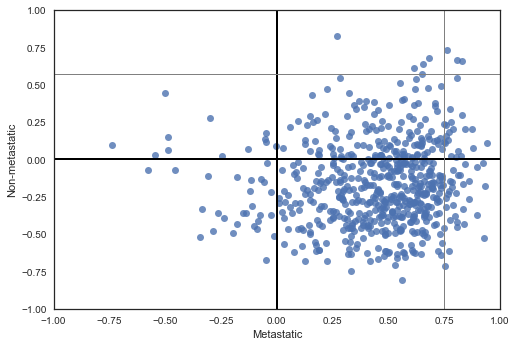

In [116]:
#Tumour Plot
lm = sns.regplot(x='Metastatic', y='Non-metastatic', data=Tumour, fit_reg=False)
axes = lm.axes
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.plot([-1, 1], [0, 0], linewidth=2, color= 'black')
plt.plot([0, 0], [-1, 1], linewidth=2, color= 'black')

#Lines for Significant correlations
plt.plot([0.75, 0.75], [-1, 1], linewidth=1, color= 'grey')
#plt.plot([-0.75, -0.75], [-1, 1], linewidth=1, color= 'grey')
plt.plot([-1, 1], [0.57, 0.57], linewidth=1, color= 'grey')
#plt.plot([-1, 1], [-0.57, -0.57], linewidth=1, color= 'grey')

plt.show()

In [117]:
Tumour.to_csv("CD3_Tumour.csv")

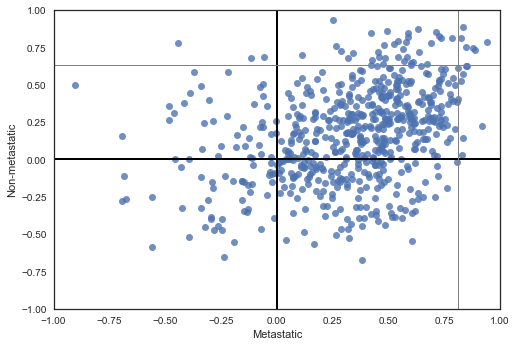

In [118]:
#Stromal Plot
lm = sns.regplot(x='Metastatic', y='Non-metastatic', data=Stroma, fit_reg=False)
axes = lm.axes
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.plot([-1, 1], [0, 0], linewidth=2, color= 'black')
plt.plot([0, 0], [-1, 1], linewidth=2, color= 'black')

#Lines for Significant correlations
plt.plot([0.81, 0.81], [-1, 1], linewidth=1, color= 'grey')
#plt.plot([-0.81, -0.81], [-1, 1], linewidth=1, color= 'grey')
plt.plot([-1, 1], [0.63, 0.63], linewidth=1, color= 'grey')
#plt.plot([-1, 1], [-0.63, -0.63], linewidth=1, color= 'grey')

plt.show()

In [119]:
Stroma.to_csv("CD3_Stroma.csv")

In [122]:
Tumour('CD3G')


TypeError: 'DataFrame' object is not callable